# Cryotherapy Analysis
Cryotherapy is a treatment where your healthcare provider applies extreme cold to freeze and destroy abnormal tissue. To create this severe cold, your provider will use a substance like liquid nitrogen or argon gas.

Cryotherapy can be used to treat a variety of skin conditions and some cancers, including prostate and liver cancer. This therapy can treat tissue externally (on the skin) and internally (inside the body).

This treatment can also be called cryoablation.

### Contents
* [**Abstract**](#abstract)
* [**Dataset**](#dataset)
* [**Importing Dataset and the required libraries**](#import)
* [**Information about the dataset**](#info)
* [**Classification Models**](#model)
    * [K-Nearest Neighbour Algorithm](#knn)
    * [Decision Tree Classifier](#dtc)
    * [Random Forest Classifier](#rfc)
    * [Gausian NB Algorithm](#gnb)
    * [Logistic Regression](#log)
    * [Support Vector Machine](#svm)
    * [Gradient Boosting Algorithm](#gb)
    * [AdaBoost Algorithm](#ada)
    * [Artificial Neural Network](#ann)
* [**Accuracy Score of the algorithms**](#score)
* [**ROC Curve of the algorithms**](#roc)
* [**Conclusion**](#conclusion)

<a id = 'abstract'></a>
### Abstract
Cryotherapy is used in an effort to relieve muscle pain, sprains and swelling after soft tissue damage or surgery. It is commonly used to accelerate recovery in athletes post exercise for decades. Scientifically, cryotherapy decreases the temperature of tissue surface to minimize hypoxic cell death, edema accumulation, and muscle spasms, all of which ultimately alleviate discomfort and inflammation. It can be a range of treatments from the application of ice packs or immersion in ice baths (generally known as cold therapy), to the use of cold chambers.

Here in this project we are going to analyze the cryotherapy dataset and will deploy several machine learning algorithm models, such as, Random Forest Classifier, Decision Tree Classifier, KNN Algorithm, Gausian NB, Logistic Regression, Support Vector Machine, Gradient Boosting, Adaboost and ANN. After deploying all the models we will do a comparative analysis among them to determine the accurate model.

### Dataset


<a id = 'import'></a>
### Importing the Dataset and the required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def precision_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        if (TP[i]==0 or FP[i]==0):
            TP[i]=0.00000001
            FP[i]=0.00000001
        sonuc+=(TP[i]/(TP[i]+FP[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc

def recall_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        if (TP[i]==0 or FN[i]==0):
            TP[i]=0.00000001
            FN[i]=0.00000001
        sonuc+=(TP[i]/(TP[i]+FN[i]))
       
    sonuc=sonuc/len(class_id)
    return sonuc
def accuracy_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        sonuc+=((TP[i]+TN[i])/(TP[i]+FP[i]+TN[i]+FN[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc
def specificity_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        if (TN[i]==0 or FP[i]==0):
            TN[i]=0.00000001
            FP[i]=0.00000001
        sonuc+=(TN[i]/(FP[i]+TN[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc
def NPV_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        if (TN[i]==0 or FN[i]==0):
            TN[i]=0.00000001
            FN[i]=0.00000001
        sonuc+=(TN[i]/(TN[i]+FN[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc
def perf_measure(y_actual, y_pred):
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1


    return class_id,TP, FP, TN, FN

In [3]:
df=pd.read_excel("D:/ML/Cryotherapy Analysis/Dataset/Cryotherapy.xlsx")

In [4]:
df.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


<a id = 'info'></a>
### Information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 5.0 KB


**The dataset consists 7 columns or, attributes -**
1. sex
2. age
3. time
4. no. of warts
5. type
6. area
7. result of the treatment

In [6]:
df.isnull().sum()

sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
Result_of_Treatment    0
dtype: int64

In [7]:
y = df['Result_of_Treatment'].values
x_data = df.drop('Result_of_Treatment',axis=1)

In [8]:
x=(x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))


<a id = 'model'></a>
## Classification Models
A classification model tries to draw some conclusion from the input values given for training. It will predict the class labels/categories for the new data.

Here we are going to prepare several Classification machine learning models based on those we will do a comparative analysis that which model is better among them.

We are using nine different classification algorithms -
* **K-Nearest Neighbours Algorithm** : K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.


* **Support Vector Machine Algorithm** : Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.


* **Random Forest Classifier** : Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.


* **Logistic Regression** : Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).


* **Naive Bayes Classifcation Algorithm** :  Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve higher accuracy levels.


* **Decision Tree Classifier** : Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.


* **Gradient Boosting Algorithm** : Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.


* **AdaBoosting Algorithm** : AdaBoost, short for Adaptive Boosting, is a statistical classification meta-algorithm formulated by Yoav Freund and Robert Schapire, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many other types of learning algorithms to improve performance.


* **Artificial Neural Network** : Artificial neural networks, usually simply called neural networks, are computing systems vaguely inspired by the biological neural networks that constitute animal brains. An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain.

Let's quickly get into the algorithms!

In [9]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)
score_liste=[]
auc_scor=[]
precision_scor=[]
recall_scor=[]
f1_scor=[]
LR_plus=[]
LR_eksi=[]
odd_scor=[]
NPV_scor=[]
youden_scor=[]
specificity_scor=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

<a id = 'knn'></a>
### K-Nearest Neighbour Algorithm
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

KNN Algorithm performance result:  0.8518518518518519


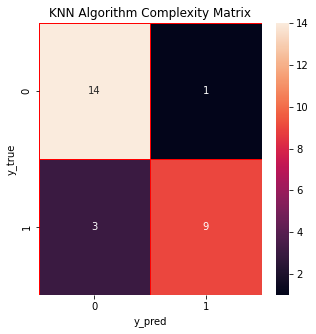

Classification report for KNN algorithm: 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.90      0.75      0.82        12

    accuracy                           0.85        27
   macro avg       0.86      0.84      0.85        27
weighted avg       0.86      0.85      0.85        27



In [10]:
k=6
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train,y_train)
y_head=knn.predict(x_test)
print("KNN Algorithm performance result: ",knn.score(x_test,y_test))

from sklearn.metrics import confusion_matrix
cmknn = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmknn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("KNN Algorithm Complexity Matrix")
plt.show()

classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
knn_fpr,knn_tpr,knn_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))

LR_plus.append((recall_hesapla(classid,tn,fp,fn,tp)/(1-specificity_hesapla(classid,tn,fp,fn,tp))))
LR_eksi.append(((1-recall_hesapla(classid,tn,fp,fn,tp))/specificity_hesapla(classid,tn,fp,fn,tp)))
odd_scor.append(((recall_hesapla(classid,tn,fp,fn,tp)/(1-specificity_hesapla(classid,tn,fp,fn,tp))))/(((1-recall_hesapla(classid,tn,fp,fn,tp))/specificity_hesapla(classid,tn,fp,fn,tp))))
youden_scor.append((recall_hesapla(classid,tn,fp,fn,tp)+specificity_hesapla(classid,tn,fp,fn,tp)-1))
print("Classification report for KNN algorithm: \n",classification_report(y_test,y_head))

<a id = 'dtc'></a>
### Decision Tree Classifier
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

Performance result for Decision Trees Algorithm:  0.6666666666666666
Classification report for DTC algorithm: 
               precision    recall  f1-score   support

           0       0.88      0.47      0.61        15
           1       0.58      0.92      0.71        12

    accuracy                           0.67        27
   macro avg       0.73      0.69      0.66        27
weighted avg       0.74      0.67      0.65        27



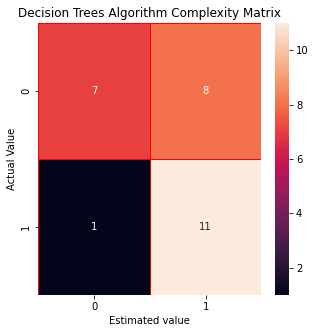

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_head=dtc.predict(x_test)
print("Performance result for Decision Trees Algorithm: ",dtc.score(x_test,y_test))

classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
dtc_fpr,dtc_tpr,dtc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)

print("Classification report for DTC algorithm: \n",classification_report(y_test,y_head))

cmdtc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmdtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Estimated value")
plt.ylabel("Actual Value")
plt.title("Decision Trees Algorithm Complexity Matrix")
plt.show()

<a id = 'rfc'></a>
### Random Forest Classifier
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

Random Forest Algorithm achievement result:  0.8148148148148148
Classification report for Random Forest algorithm: 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.71      1.00      0.83        12

    accuracy                           0.81        27
   macro avg       0.85      0.83      0.81        27
weighted avg       0.87      0.81      0.81        27



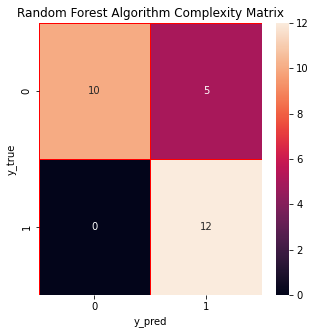

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=225,random_state=1)
rfc.fit(x_train,y_train)
y_head=rfc.predict(x_test)
print("Random Forest Algorithm achievement result: ",rfc.score(x_test,y_test))

classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
rfc_fpr,rfc_tpr,rfc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Classification report for Random Forest algorithm: \n",classification_report(y_test,y_head))

cmrfc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmrfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Algorithm Complexity Matrix")
plt.show()

<a id = 'gnb'></a>
### Gausian Naive Bayes Classifier Algorithm
Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve higher accuracy levels.

Naive Bayes Algorithm performance result:  0.8518518518518519
Classification report for Naive Bayes algorithm: 
               precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.75      1.00      0.86        12

    accuracy                           0.85        27
   macro avg       0.88      0.87      0.85        27
weighted avg       0.89      0.85      0.85        27



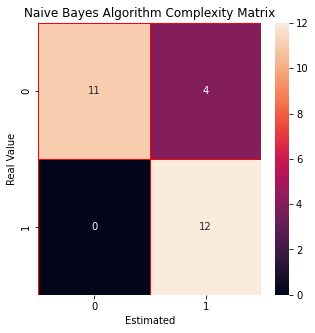

In [13]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_head=nb.predict(x_test)
print("Naive Bayes Algorithm performance result: ",nb.score(x_test,y_test))


classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
nb_fpr,nb_tpr,nb_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Classification report for Naive Bayes algorithm: \n",classification_report(y_test,y_head))

cmnb = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmnb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Estimated")
plt.ylabel("Real Value")
plt.title("Naive Bayes Algorithm Complexity Matrix")
plt.show()

<a id = 'log'></a>
### Logistic Regression
 Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

Logistic Regression Algorithm performance result:  0.8148148148148148
Classification report for Logistic Regression algorithm: 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.71      1.00      0.83        12

    accuracy                           0.81        27
   macro avg       0.85      0.83      0.81        27
weighted avg       0.87      0.81      0.81        27



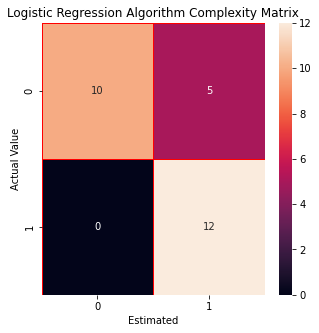

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_head=lr.predict(x_test)
print("Logistic Regression Algorithm performance result: ",lr.score(x_test,y_test))


classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
lrc_fpr,lrc_tpr,lrc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Classification report for Logistic Regression algorithm: \n",classification_report(y_test,y_head))

cmlr = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmlr,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Estimated")
plt.ylabel("Actual Value")
plt.title("Logistic Regression Algorithm Complexity Matrix")
plt.show()

<a id = "svm"></a>
### SVM Classification
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

Support Vector Machines Algorithm achievement result:  0.8888888888888888
Classification report for Support Vector Machines algorithm: 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.80      1.00      0.89        12

    accuracy                           0.89        27
   macro avg       0.90      0.90      0.89        27
weighted avg       0.91      0.89      0.89        27



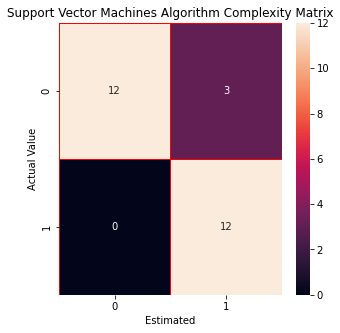

In [15]:
from sklearn.svm import SVC
svc=SVC(random_state=1)
svc.fit(x_train,y_train)
y_head=svc.predict(x_test)
print("Support Vector Machines Algorithm achievement result: ",svc.score(x_test,y_test))


classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
svc_fpr,svc_tpr,svc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Classification report for Support Vector Machines algorithm: \n",classification_report(y_test,y_head))

cmsvc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmsvc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Estimated")
plt.ylabel("Actual Value")
plt.title("Support Vector Machines Algorithm Complexity Matrix")
plt.show()

<a id = 'gb'></a>
### Gradient Boosting Algorithm
Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

Gradient Boosting Classifier Algorithm achievement result:  0.8518518518518519
Classification report for the Gradient Boosting Classifier algorithm: 
               precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.75      1.00      0.86        12

    accuracy                           0.85        27
   macro avg       0.88      0.87      0.85        27
weighted avg       0.89      0.85      0.85        27



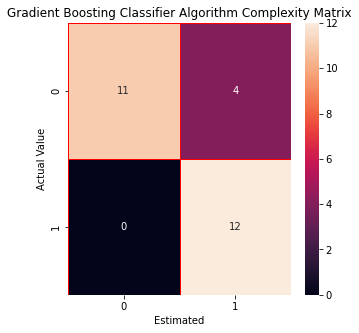

In [16]:
gfc=GradientBoostingClassifier(n_estimators= 1000, max_leaf_nodes= 4, max_depth=None,random_state= 2,min_samples_split= 5)
gfc.fit(x_train,y_train)
y_head=gfc.predict(x_test)
print("Gradient Boosting Classifier Algorithm achievement result: ",gfc.score(x_test,y_test))

classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
gfc_fpr,gfc_tpr,gfc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Classification report for the Gradient Boosting Classifier algorithm: \n",classification_report(y_test,y_head))

cmgfc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmgfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Estimated")
plt.ylabel("Actual Value")
plt.title("Gradient Boosting Classifier Algorithm Complexity Matrix")
plt.show()

<a id = 'ada'></a>
### AdaBoost Algorithm
AdaBoost, short for Adaptive Boosting, is a statistical classification meta-algorithm formulated by Yoav Freund and Robert Schapire, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many other types of learning algorithms to improve performance.

AdaBoosting Classifier Algorithm performance result:  0.8148148148148148
Classification report for AdaBoosting Classifier algorithm: 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.71      1.00      0.83        12

    accuracy                           0.81        27
   macro avg       0.85      0.83      0.81        27
weighted avg       0.87      0.81      0.81        27



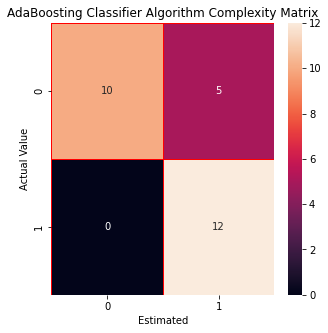

In [17]:
abc=AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(x_train,y_train)
y_head=abc.predict(x_test)
print("AdaBoosting Classifier Algorithm performance result: ",abc.score(x_test,y_test))


classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
abc_fpr,abc_tpr,abc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Classification report for AdaBoosting Classifier algorithm: \n",classification_report(y_test,y_head))

cmabc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmabc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Estimated")
plt.ylabel("Actual Value")
plt.title("AdaBoosting Classifier Algorithm Complexity Matrix")
plt.show()

<a id = 'ann'></a>
### Artificial Neural Networks Algorithm
Artificial neural networks, usually simply called neural networks, are computing systems vaguely inspired by the biological neural networks that constitute animal brains. An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain.

Artificial Neural Networks Algorithm performance result:  0.8518518518518519
Classification report for Neural Networks algorithm: 
               precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.75      1.00      0.86        12

    accuracy                           0.85        27
   macro avg       0.88      0.87      0.85        27
weighted avg       0.89      0.85      0.85        27



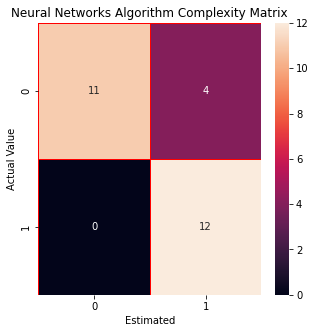

In [18]:
ysa=MLPClassifier(alpha=1, max_iter=1000)
ysa.fit(x_train,y_train)
y_head=ysa.predict(x_test)
print("Artificial Neural Networks Algorithm performance result: ",ysa.score(x_test,y_test))


classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
ysa_fpr,ysa_tpr,ysa_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Classification report for Neural Networks algorithm: \n",classification_report(y_test,y_head))

cmysa = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmysa,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Estimated")
plt.ylabel("Actual Value")
plt.title("Neural Networks Algorithm Complexity Matrix")
plt.show()

In [19]:
algo_liste=["KNN","Decision Tree","Random Forest","Naive Bayes","Linear Regression","Support Vector Machine","Gradient Boosting Classifier","AdaBoosting Classifier","Neural Network"]
score={"algo_list":algo_liste,"score_liste":score_liste,"precision":precision_scor,"recall":recall_scor,"f1_score":f1_scor,"AUC":auc_scor,"LR+":LR_plus,"LR-":LR_eksi,"ODD":odd_scor,"YOUDEN":youden_scor,"Specificity":specificity_scor}

<a id = 'score'></a>
### Accuracy Scores of the Algorithms

Accuracy checking parameters are -
* **Precision** : Precision quantifies the number of positive class predictions that actually belong to the positive class.
* **Recall** : Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
* **F-score** : F-Measure provides a single score that balances both the concerns of precision and recall in one number.
* **AUC** : AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve
* **LR+** : Probability that a person with the disease tested positive/probability that a person without the disease tested positive. i.e., LR+ = true positive/false positive.
* **LR-** : Probability that a person with the disease tested negative/probability that a person without the disease tested negative.
* **ODD ratio** : The odds ratio is used to find the probability of an outcome of an event when there are two possible outcomes and there is a plausible causal effect.
* **Youden Index** : Youden index [J] will indicate the performance (the larger the better) at a given cutoff.

In [20]:
df=pd.DataFrame(score)
df

,algo_list,score_liste,precision,recall,f1_score,AUC,LR+,LR-,ODD,YOUDEN,Specificity
0,KNN,0.851852,0.861765,0.841667,0.846591,0.841667,5.315789,0.188119,28.257618,0.683333,0.841667
1,Decision Tree,0.666667,0.726974,0.691667,0.659187,0.691667,2.243243,0.445783,5.032140,0.383333,0.691667
2,Random Forest,0.814815,0.602941,0.250000,0.813793,0.833333,1.500000,0.900000,1.666667,0.083333,0.833333
3,Naive Bayes,0.851852,0.625000,0.250000,0.851648,0.866667,1.875000,0.865385,2.166667,0.116667,0.866667
4,Linear Regression,0.814815,0.602941,0.250000,0.813793,0.833333,1.500000,0.900000,1.666667,0.083333,0.833333
5,Support Vector Machine,0.888889,0.650000,0.250000,0.888889,0.900000,2.500000,0.833333,3.000000,0.150000,0.900000
6,Gradient Boosting Classifier,0.851852,0.625000,0.250000,0.851648,0.866667,1.875000,0.865385,2.166667,0.116667,0.866667
7,AdaBoosting Classifier,0.814815,0.602941,0.250000,0.813793,0.833333,1.500000,0.900000,1.666667,0.083333,0.833333
8,Neural Network,0.851852,0.625000,0.250000,0.851648,0.866667,1.875000,0.865385,2.166667,0.116667,0.866667


<a id = 'roc'></a>
### ROC Curve of the algorithms
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate.

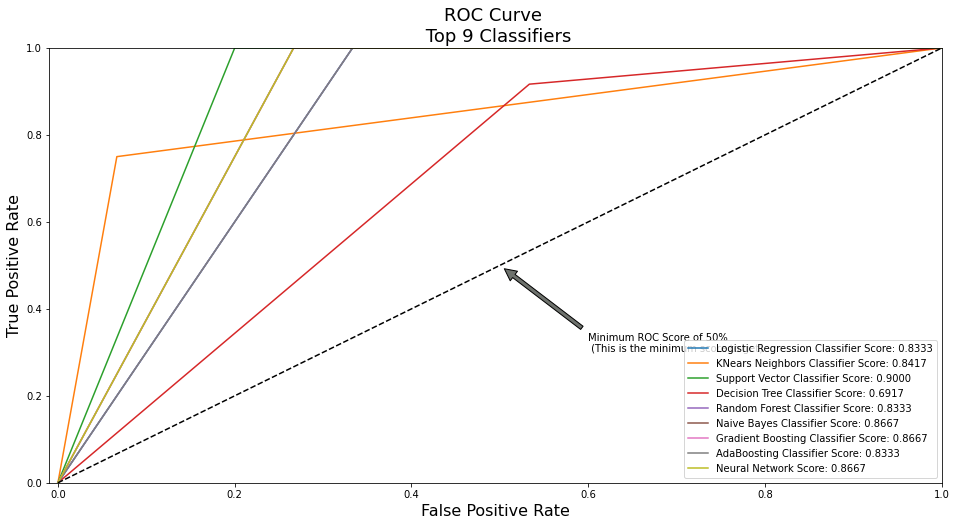

In [21]:
def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr,rfc_fpr,rfc_tpr,nb_fpr,nb_tpr,gbc_fpr,gbc_tpr,abc_fpr,abc_tpr,ysa_fpr,ysa_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 9 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, lr.predict(x_test))))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knn.predict(x_test))))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc.predict(x_test))))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, dtc.predict(x_test))))
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rfc.predict(x_test))))
    plt.plot(nb_fpr, nb_tpr, label='Naive Bayes Classifier Score: {:.4f}'.format(roc_auc_score(y_test, nb.predict(x_test))))
    plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier Score: {:.4f}'.format(roc_auc_score(y_test, gfc.predict(x_test))))
    plt.plot(abc_fpr, abc_tpr, label='AdaBoosting Classifier Score: {:.4f}'.format(roc_auc_score(y_test, abc.predict(x_test))))
    plt.plot(ysa_fpr, ysa_tpr, label='Neural Network Score: {:.4f}'.format(roc_auc_score(y_test, ysa.predict(x_test))))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(lrc_fpr, lrc_tpr, knn_fpr, knn_tpr, svc_fpr, svc_tpr, dtc_fpr, dtc_tpr,rfc_fpr,rfc_tpr,nb_fpr,nb_tpr,gfc_fpr,gfc_tpr,abc_fpr,abc_tpr,ysa_fpr,ysa_tpr)
plt.show()

<a id = 'conclusion'></a>
## Conclusion and Comparison
We have deployed nine machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Logistic Regression|83.33|
|Decision Tree Classifier|69.17|
|Random Forest Classifier|83.33|
|Naive Bayes Algorithm|86.67|
|KNN Algorithm|84.17|
|Support Vector Machine Algorithm|83.33|
|Gradient Boosting Algorithm|83.33|
|AdaBoosting Classifier|83.33|
|Artificial Neural Network|86.67|

**Comparing all those scores scored by the machine learning algorithms, it is clear that Artificial Neural Network and Naive Bayes Algorithm are having the upper hand in case of this dataset and after this, we can use Logistic regression, Random Forest Classifier, SVM, Gradient Boosting, AdaBoosting algorithm, which are also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. ANN
2. Naive Bayes
3. Logistic Regression
4. Randm Forest classifier
5. SVM
6. Gradient Boosting
7. AdaBoosting
8. KNN
9. Decision Tree Classifier